In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Cardiovascular dataset.csv",sep=';')

In [4]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# What is the shape of the dataset?

df.shape

(70000, 13)

In [6]:
#  Are there any missing values in the dataset?

df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [7]:
# What are the unique values for categorical features like gender, cholesterol, gluc?

df[['gender','cholesterol','gluc']].nunique()

gender         2
cholesterol    3
gluc           3
dtype: int64

In [8]:
# What’s the average age of patients (in years)?

df['age_years']=(df['age']/365)
df['age_years'].mean()

np.float64(53.33935839530333)

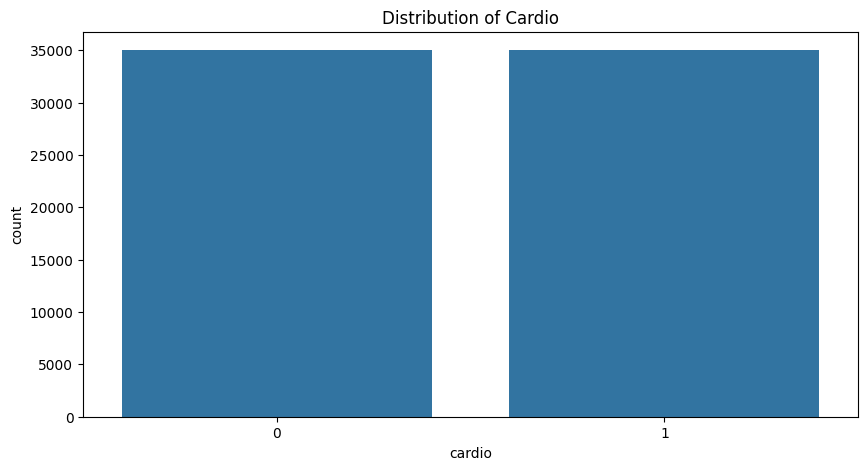

In [9]:
# What is the distribution of the target variable (cardio)? 

plt.figure(figsize=(10,5))
sns.countplot(data=df,x='cardio')
plt.title("Distribution of Cardio")
plt.show()

In [10]:
# What is the distribution of BMI? (Create new BMI feature)

df['BMI']=df['weight']/(df['height']/100)**2

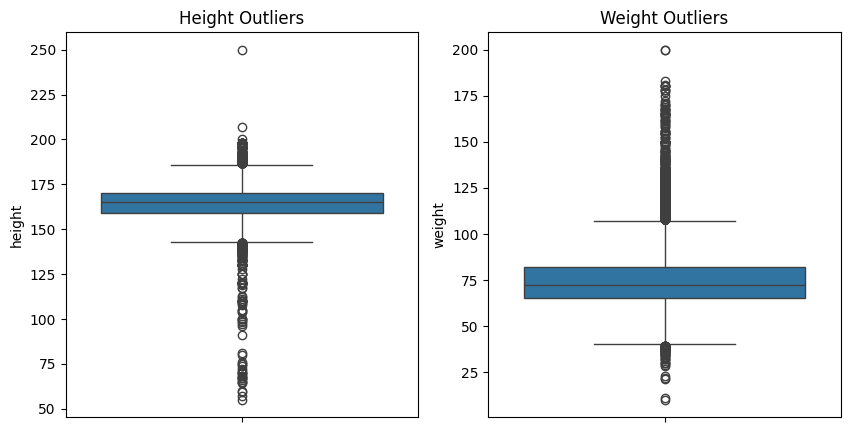

In [11]:
#  Are there outliers in height or weight? 

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y=df['height'])
plt.title("Height Outliers")

plt.subplot(1,2,2)
sns.boxplot(y=df['weight'])
plt.title("Weight Outliers")
plt.show()

In [12]:
for col in ['height','weight']:
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR

    df=df[(df[col] >= lower) & (df[col] <= upper)]

In [13]:
print(df.shape)

(67723, 15)


In [14]:
# Are there implausible blood pressure values (e.g., ap_hi < ap_lo or too high)? 

implausible_bp=df[(df['ap_hi']<df['ap_lo'])|
                  (df['ap_hi']<80)| (df['ap_hi']>250)|
                  (df['ap_lo']<50)| (df['ap_lo']>200)
                  ]

In [15]:
#  How many rows have incorrect blood pressure values? 

implausible_bp.shape[0]

1260

In [16]:
# Remove rows with invalid blood pressure, height, or weight? 
# Height between  120cm to 220cm 
# Weight between 40 to 200kg 

df_clean=df[(df['height'].between(120,220))&
            (df['weight'].between(40,200))&
            (df['ap_hi'].between(80,250))&
            (df['ap_lo'].between(50,200))&
            (df['ap_hi'] >= df['ap_lo'])]
print("Shape before cleaning",df.shape)
print("Shape after cleaning",df_clean.shape)

Shape before cleaning (67723, 15)
Shape after cleaning (66463, 15)


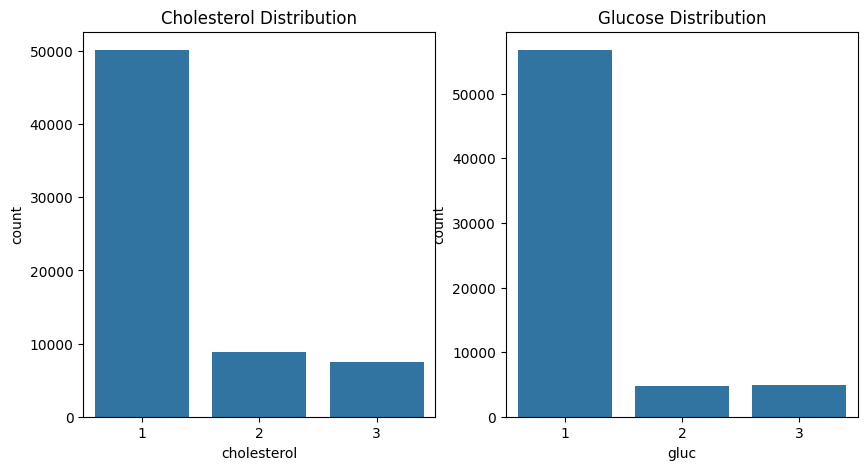

In [17]:
# What is the distribution of cholesterol and glucose levels after cleaning? 

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(x=df_clean['cholesterol'])
plt.title("Cholesterol Distribution")

plt.subplot(1,2,2)
sns.countplot(x=df_clean['gluc'])
plt.title("Glucose Distribution")
plt.show()

In [18]:
# How many smokers have cardiovascular disease?

smoke_cardio=df_clean[(df_clean['smoke']==1) & (df_clean['cardio']==1)]
len(smoke_cardio)

2641

In [41]:
#  Does alcohol intake correlate with higher cardio risk?
pd.crosstab(df_clean['alco'],df_clean['cardio'],normalize='index')


cardio,0,1
alco,,
0,0.509050,0.490950
1,0.532318,0.467682


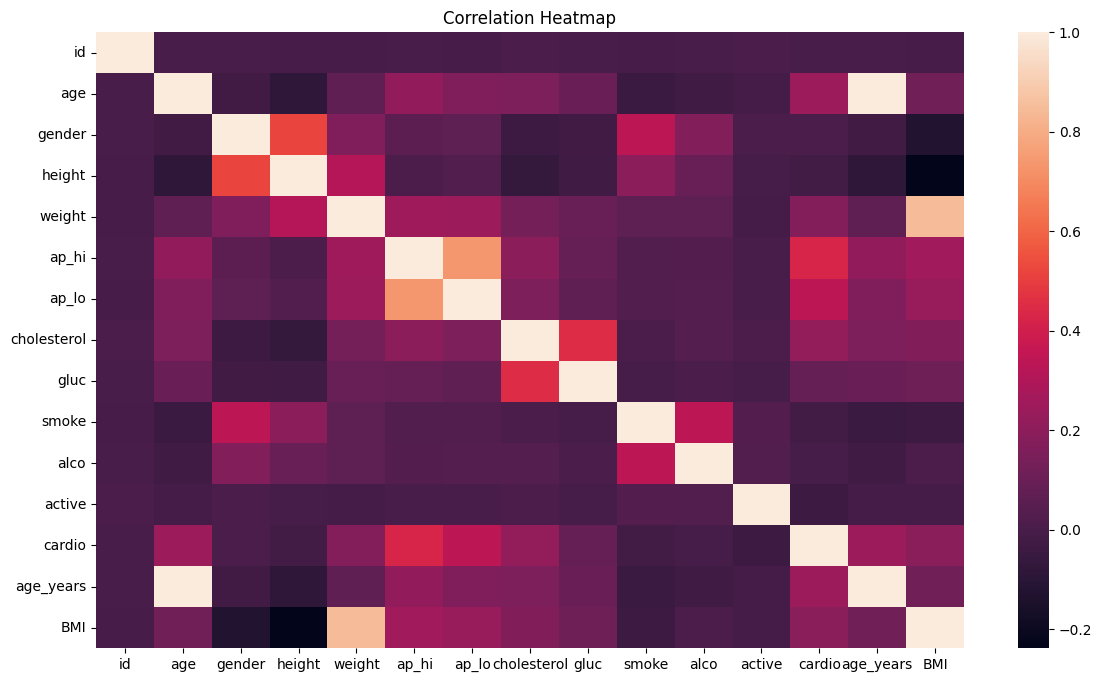

In [20]:
# What’s the correlation between features? 
plt.figure(figsize=(14,8))
sns.heatmap(data=df_clean.corr())
plt.title("Correlation Heatmap")
plt.show()

In [21]:
# Compare mean BMI for cardio vs. non-cardio 

df_clean.groupby('cardio')['BMI'].mean()

cardio
0    26.227397
1    27.968412
Name: BMI, dtype: float64

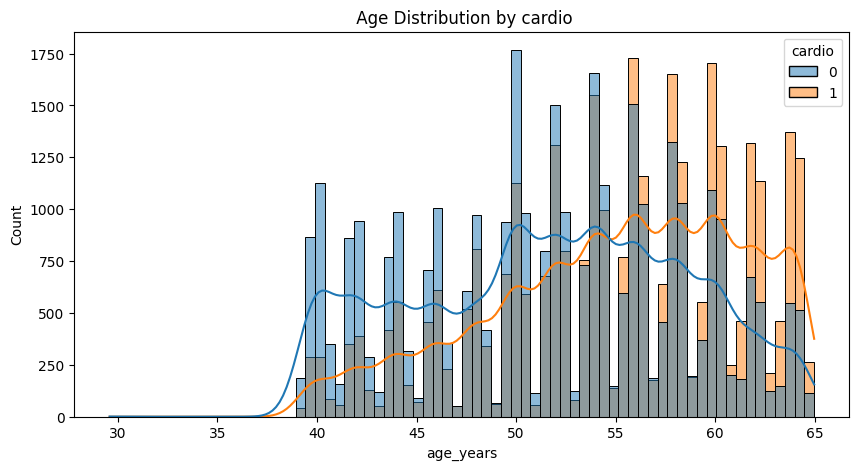

In [22]:
# Plot age distribution for those with and without cardio disease

plt.figure(figsize=(10,5))
sns.histplot(data=df_clean,x='age_years',hue='cardio',kde=True)
plt.title(" Age Distribution by cardio")
plt.show()


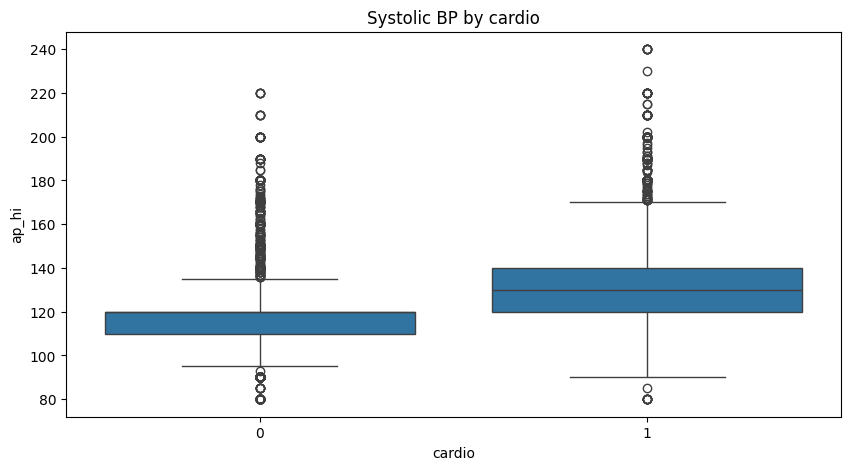

In [23]:
#  Boxplot of systolic blood pressure by cardio status
plt.figure(figsize=(10,5))
sns.boxplot(x='cardio',y='ap_hi',data=df_clean)
plt.title("Systolic BP by cardio")
plt.show()

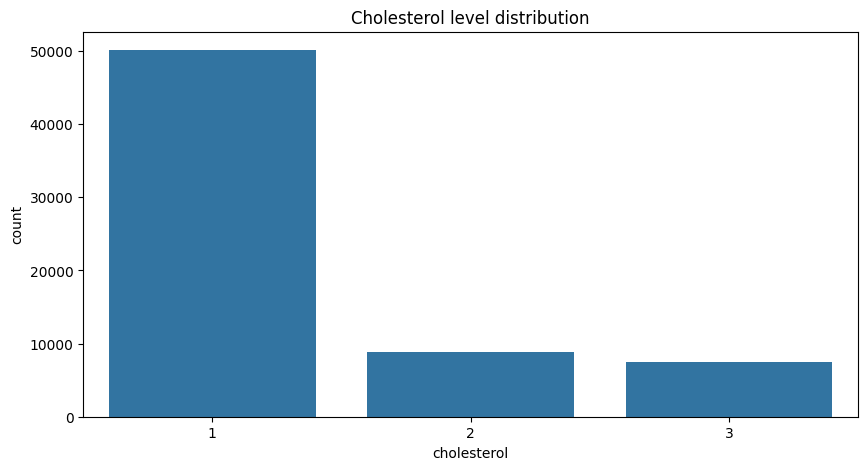

In [24]:
#  What is the distribution of cholesterol levels?
plt.figure(figsize=(10,5))
sns.countplot(data=df_clean,x='cholesterol')
plt.title("Cholesterol level distribution")
plt.show()

In [25]:
# What percentage of patients have above-normal glucose levels?

above_gluc=df_clean[df_clean['gluc'] > 1]
percentage_gluc=(len(above_gluc)/len(df_clean))*100
percentage_gluc

14.60060484781006

## Insightful Analysis Question

In [26]:
# What percentage of the dataset has cardiovascular disease?
cardio_percentage=[df_clean['cardio'].mean()*100]
cardio_percentage

[np.float64(48.97311285978665)]

In [40]:
# Is there a link between cholesterol and heart disease?
pd.crosstab(df_clean['cholesterol'],df_clean['cardio'],normalize='index')*100

cardio,0,1
cholesterol,,
1,56.854686,43.145314
2,40.802337,59.197663
3,24.016118,75.983882


In [28]:
#  Does age impact heart disease prevalence?
df_clean.groupby('cardio')['age_years'].mean()

cardio
0    51.716629
1    55.003934
Name: age_years, dtype: float64

In [29]:
# Is BMI higher in those with heart disease? 
df_clean.groupby('cardio')['BMI'].mean()

cardio
0    26.227397
1    27.968412
Name: BMI, dtype: float64

In [35]:
# Does physical activity reduce heart disease risk?
pd.crosstab(df_clean['active'],df_clean['cardio'],normalize='index')

cardio,0,1
active,,
0,0.472098,0.527902
1,0.519559,0.480441


In [36]:
# Do smokers have more heart disease?
pd.crosstab(df_clean['smoke'],df_clean['cardio'],normalize='index')

cardio,0,1
smoke,,
0,0.507298,0.492702
1,0.541573,0.458427


In [37]:
# Is systolic pressure significantly higher in those with heart disease?
df_clean.groupby('cardio')['ap_hi'].mean()

cardio
0    119.465530
1    133.600633
Name: ap_hi, dtype: float64